## Logistic Regression MLE, Gradient Descent, Model Evaluation Concepts

* This ipynb notebook explains Logistic Regression, its Cost function formulation, Gradient Descent implementation, and a small example which explains ROC/ AUC curves.


* Let us consider a Binary Logistic Regression model, to help classify breast cancer from sklearn dataset. First, we take a look at forming the cost function, and how it lends itself to gradient descent.


* Logistic regression uses the Sigmoid function, which converts any value from [0,1], and can be used to represent the probability of belonging to a class, let us say '1'. Below is a plot of Sigmoid function.

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# loading breast cancer dataset from sklearn
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df_data = pd.DataFrame(data['data'])
df_data.columns = data['feature_names']

df_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Text(0, 0.5, 'activated x')

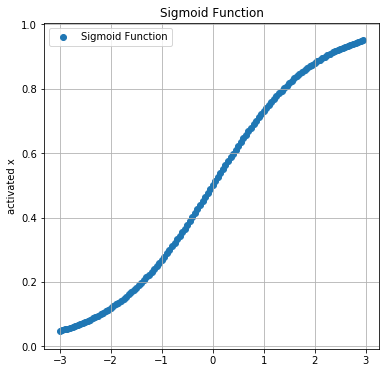

In [4]:
# Sigmoid function -> maps input to [0,1]
def sigmoid(X):
    return (1/(1+np.exp(-X)))

# Sigmoid plot
plt.figure(figsize=(6,6))
plt.scatter(np.arange(-3,3,0.05), sigmoid(np.arange(-3,3,0.05)), label='Sigmoid Function')
plt.grid(), plt.legend(loc='upper left'), plt.title("Sigmoid Function")
plt.ylabel('activated x')

### Propagation Step:

* Let us consider an input matrix with n-samples and 2 attributes (X1, X2). Let there be two output classes 0 and 1. For each of the input attributes (X1, X2), we would have weights (W1, W2) corresponding to them. We would also include term 'b' for intercept.


* As a Linear combination of these weighted input vectors are 'activated' using the sigmoid function, we assume that to equate to the probability of belonging to class 1. Each of these independent events can be treated as - 'n' Bernoulli trials, which have probability 'p' of beloning to a class.


* In terms of Maximum Likelihood Estimate, we need to maximize 'n' independent Bernaolli trials. 

$$ MLE = \sum_{i=1}^{n} (p)^{y}(1-p)^{1-y} $$

* We know that the probability 'p' of belonging to class y, can be rewritten as 
$p = \sigma(W^tX)$, where p is the probability of belonging to class 1 (y=1).

$$ MLE = \sum_{i=1}^{n} (p)^{y}(1-p)^{1-y} = \sum_{i=1}^{n} \sigma(W^tX)^{y}(1-\sigma(W^tX))^{1-y} $$

* We then activate Z, by using Sigmoid function, which returns a probability of belonging to class 1, from [0,1].

<img src="img1.jpeg" width="700">
<img src="img2.jpeg" width="700">

### Back-Propagation Step:
* As this is a Single Layer Neural Net, there is just one back-propagation step involved. Each of the input parameter vector (w and b, in this case), decreases its value by a learning rate '$\alpha$' times the derivative of loss function with respect to itself. Hence, the learning_rate in itself is a hyperparameter and needs to be initialized properly, for efficient training process.


* Below is the math behind finding derivatives of cost function with respect to parameters, which will aid with update parameter step.

<img src="img3.jpeg" width="700">

####  For each iteration:
1) Propagation Step:

* compute linear combination of weights and input vector
* activate input vector and store in vector A
* compute cost with the current weights

2) Back-Prop Step:

* compute derivates/ slope of cost function with respect to corresponding weights
* Update weights

3) Prediction:

* Predict class

#### Note: The above probagation & Back-propagation steps are important concepts of any Neural Network.

### Now, let us use sklearns Logistic Regression Classifier to help classify breast cancer. With this example, let us try to understand the concepts of confusion matrix, ROC & AUC curves; and the process of model evaluation. 

In [5]:
df_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
# Now, we split the dataset into train and test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_data, data.target, test_size=0.33, random_state=42)

X_train.shape, X_test.shape

((381, 30), (188, 30))

In [17]:
from sklearn.linear_model import LogisticRegression

# classifier
clf_lr = LogisticRegression()

# training dataset
clf_lr.fit(X_train, y_train)

# prediction step
y_pred = clf_lr.predict(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [18]:
# We obtain accuracy of 95 %
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9574468085106383


# Model Evaluation

## Confusion Matrix 

* From the above confusion matrix, we have four numbers. For a confusin matrix, the two rows are the predicted values and the columns are the ground truth. Both the cases below together, are the numerator to calculate accuracy (Both of them tend to classify class-0 or 1 correctly).

1) True Positives: Number of rows which are predicted class 1, and are actually class 1.

2) True Negatives: Number of rows which are predicted class 0, and are actually class 0.

$$ Accuracy Rate = (TP + TN)/ (TP + TN + FP + FN) $$

* In terms of errors, there can be one of the following two types.

1). Type-I Error: False Positives: Number of rows which are predicted class 1, but actually class 0.

2). Type-II Error: False Negatives: Number of rows which are predicted class 0, but actually class 1.

$$ Error Rate = (FP + FN)/ (TP + TN + FP + FN) $$

In [38]:
# Confusion Matrix

con_matrix = pd.DataFrame({'Index Title':['Predicted_Yes','Predicted_No']})
con_matrix.index = con_matrix['Index Title']
del con_matrix['Index Title']
con_matrix['Actual_Yes'] = ['TP','FN']
con_matrix['Actual_No'] = ['FP', 'TN']
con_matrix

,Actual_Yes,Actual_No
Index Title,,
Predicted_Yes,TP,FP
Predicted_No,FN,TN


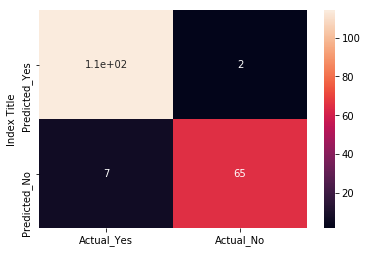

In [82]:
# From the above case

from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Confusion Matrix
con_matrix = pd.DataFrame({'Index Title':['Predicted_Yes','Predicted_No']})
con_matrix.index = con_matrix['Index Title']
del con_matrix['Index Title']
con_matrix['Actual_Yes'] = [tp, fn]
con_matrix['Actual_No'] = [fp, tn]
sns.heatmap(con_matrix, annot=True)

In [43]:
tn, fp, fn, tp

(63, 4, 4, 117)

## Accuracy, Sensitivity, Specificity & F1 score

* <strong>Accuracy</strong>: Both True positives and True negatives contribute to overall accuracy. In our example, 

$$Accuracy = (𝑇𝑃+𝑇𝑁)/(𝑇𝑃+𝑇𝑁+𝐹𝑃+𝐹𝑁) = (117 + 63)/ (117 + 63 + 4 + 3) = 0.96 $$

* <strong>Sensitivity</strong>: Ability of classifier to correctly pickup positive case, given it is actually positive. Foe example: In our case, it would be the ratio of people classified with breast cancer, in the cohort of people who actually have breast cancer.

$$Sensitivity = TP/ (TP + FN) = 117/ (117 + 4) = 0.966 $$

* <strong>Specificity</strong>: Ability of classifier to correctly reject healthy patients without breast cancer.

$$Specificity = TN/ (TN + FP) = 63/ (63 + 4) = 0.94 $$

* Based on our example and context, we might choose one classifier over the other based on ROC/ AUC metrics. Before that, below is a simple visualization of confusion matrix based on our current example.

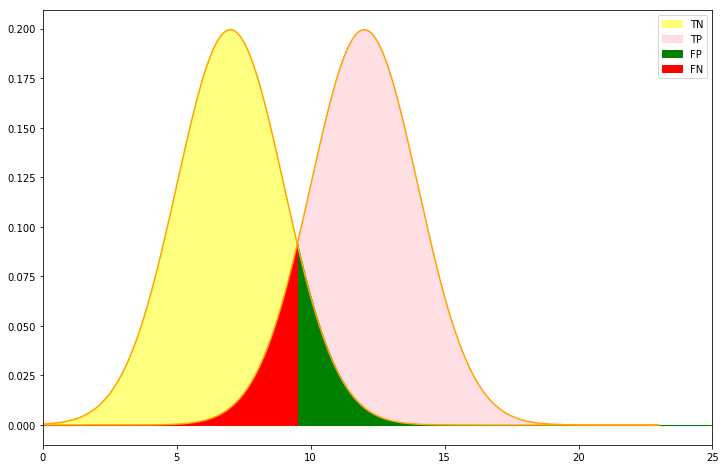

In [78]:
from scipy.stats import norm

plt.figure(figsize=(12,8))
plt.xlim(0,25)
plt.plot(np.arange(0, 23, 0.01), norm.pdf(np.arange(0, 23, 0.01), 7, 2),'orange')

plt.fill_between(np.arange(0, 9.5, 0.01), norm.pdf(np.arange(0, 9.5, 0.01), 7, 2), 0, 
                 color='yellow',       
                 alpha=0.5, label='TN')

plt.fill_between(np.arange(9.5, 25, 0.01), norm.pdf(np.arange(9.5, 25, 0.01), 12, 2), 0, 
                 color='pink',       
                 alpha=0.5, label='TP')

plt.fill_between(np.arange(9.5, 25, 0.01), norm.pdf(np.arange(9.5, 25, 0.01), 7, 2), 0, 
                 color='green',       
                 alpha=1, label='FP')

plt.fill_between(np.arange(0, 9.5, 0.01), norm.pdf(np.arange(0, 9.5, 0.01), 12, 2), 0, 
                 color='red',       
                 alpha=1, label='FN')

plt.plot(np.arange(0, 23, 0.01), norm.pdf(np.arange(0, 23, 0.01), 12, 2),'orange')

plt.legend()

* From the above graph, we see that the region in yellow, classifies all points in class 0, and region in pink belongs to class 1 (Have cancer). We see that there are two smaller regions, red and green.

* The green region belongs to False Positives (Type-I Error/ Sensitivity), and red region belongs to Type-II Error. In this case, Type-II error is much more dangerous (not able to detect cancer, which eventually becomes harder to solve cancer). Type-I error is important as well, but the cost of not being able to detect breast cancer is more dangerous than mistreating a patient with no breast cancer.

### Hence, Sensitivity of the classifier is of most importance in this scenario. Red-region needs to be as small as possible, or Sensitivity needs to be as high as possible. 

* Let us use a Decision Tree Classifier and see how it performs incomparison to a basic logistic Regressor.

In [159]:
from sklearn.tree import DecisionTreeClassifier

# classifier
clf_dt = DecisionTreeClassifier()

# training dataset
clf_dt.fit(X_train, y_train)

# prediction step
y_pred = clf_dt.predict(X_test)

# We obtain accuracy of 95 %
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.925531914893617


In [160]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [163]:
# We see that sensitivity is not as high as Logistic Regressor
sensitivity = tp/(tp+fn)
sensitivity

0.9256198347107438

### Clearly, we would choose Logistic Regression Model over Decision Tree, due to better classification accuracy as well as better Sensitivity.

## ROC, AUC

* The 'ROC' stands for Receiver Operating Characteristic, which is a diagnostic plot over varying thresholds. 'AUC' stands for Area Under Curve, and specifically Area under ROC curve. Better the classifier, higher the AUC.


* The axes of ROC curve are FPR (False Positive Rate) & TPR (True Positive Rate), x-y axes respectively, Hence, we can visually understand Type-I error rate, which makes it easier for decision making.

* Ideally, we should have X-axis at 0 (No False Positives/ No Type-I error), and Y-axis at 1 (High True Positive rate), making AUC ~= 1.

Text(0, 0.5, 'TPR')

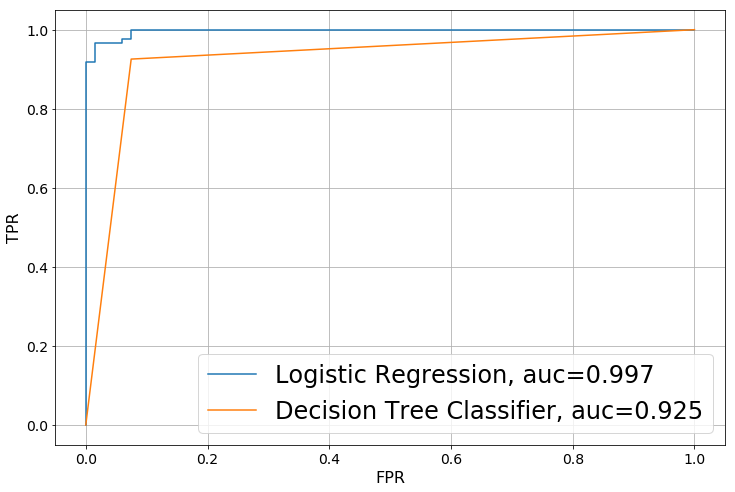

In [166]:
from sklearn import metrics
plt.figure(figsize=(12,8))

y_pred_proba = clf_lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Logistic Regression, auc="+str(np.round(auc,3)))
plt.legend()

y_pred_proba = clf_dt.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Decision Tree Classifier, auc="+str(np.round(auc,3)))
plt.legend()

plt.grid()
plt.xlabel('FPR')
plt.ylabel('TPR')

* Above, we clearly see that AUC of Logistic Regression model is higher when compared to Decision Tree Classifier. TPR is highest, however, the tradeoff is that FPR (Type-I) becomes equal to 1. Hence, we need to decide the threshold in a way which might favor reducing Type-I or Type-II error rate.